In [2]:
import numpy as np
import cv2 as cv
from pathlib import Path
import matplotlib.pyplot as plt
from typing import Union
from math import ceil
plt.rcParams["figure.figsize"] = [10,10]
from PIL import Image

In [4]:
out_dir = Path("dataset_segmentation_custom_bg")
imgs_dir = Path("dataset_segmentation/images")
masks_dir = Path("dataset_segmentation/labels")
bg_dir = Path("backgrounds")

In [5]:
bg1 = cv.imread(str(bg_dir/"0000.tif"))

In [9]:
type(bg1)

numpy.ndarray

In [6]:
plt.imshow(bg1)

FigureCanvasNbAgg()

In [14]:
bg1.shape

(170, 170, 3)

In [16]:
img = np.empty((1700,1700,3), dtype="uint8")

In [40]:
def repeated_bg(bg: np.ndarray, size: Union[int,int])-> np.ndarray:
    """return an image of the given size with the background repeaten to fill everything"""
    x,y = size
    bg_x, bg_y, bg_z = bg.shape
    nx = ceil(x / bg_x) 
    ny = ceil(y/ bg_y)
    # 1 to not repeat z axis
    return np.tile(bg, (nx,ny,1))[:x,:y,:]

In [47]:
nbg = repeated_bg(bg1, (1123,2784))

In [48]:
nbg.shape

(1123, 2784, 3)

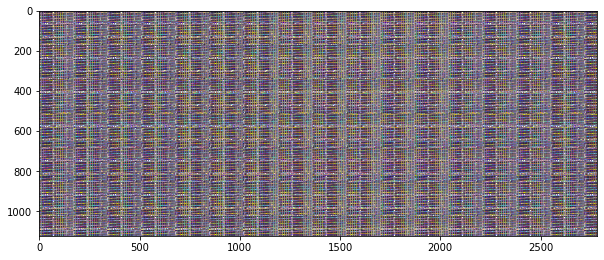

In [49]:
plt.imshow(nbg)

In [66]:
img = imgs_dir / "albicocche1.png"
mask = masks_dir / "albicocche1.png"

In [92]:
im = np.array(Image.open(img))

In [93]:
ms = np.array(Image.open(mask), dtype=np.bool)

In [94]:
bg = repeated_bg(bg1, im.shape[:2])

In [95]:
out_img = np.where(np.expand_dims(ms,2),im, bg )

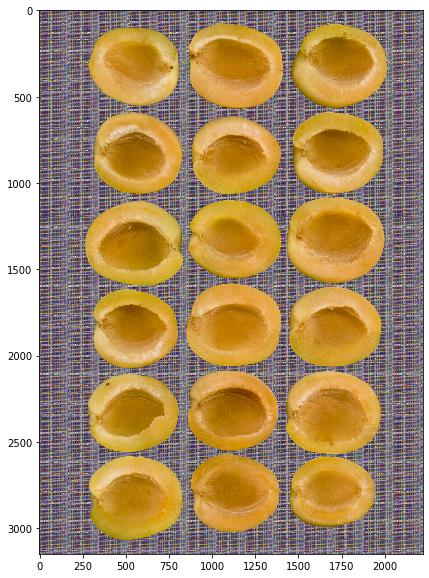

In [96]:
plt.imshow(out_img)

In [1]:
%matplotlib widget